In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

high_correlations = pd.read_csv('high_correlations.csv')
target_variable = high_correlations['market_value_capped']
high_correlations = high_correlations.drop(columns=['market_value_capped'])
X_train, X_test, y_train, y_test = train_test_split(high_correlations, target_variable, test_size=0.2, random_state=42)


pca_10principal = pd.read_csv('pca_10component.csv')
target_variable = pca_10principal['market_value_capped']
pca_10principal = pca_10principal.drop(columns=['market_value_capped'])
PCA_X_train, PCA_X_test, PCA_y_train, PCA_y_test = train_test_split(pca_10principal, target_variable, test_size=0.2, random_state=42)

# Naively Applying Regression Models

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
print("HIGH_CORR_LIN_MODEL:", lin_model.score(X_test, y_test))
print("HIGH_CORR_LIN_MODEL RMSE:", root_mean_squared_error(lin_model.predict(X_test), y_test))

pca_lin_model = LinearRegression()
pca_lin_model.fit(PCA_X_train, PCA_y_train)
print("PCA_LIN_MODEL:", pca_lin_model.score(PCA_X_test, PCA_y_test))
print("PCA_LIN_MODEL RMSE:", root_mean_squared_error(pca_lin_model.predict(PCA_X_test), PCA_y_test))

HIGH_CORR_LIN_MODEL: 0.967245970872718
HIGH_CORR_LIN_MODEL RMSE: 14054.968023121482
PCA_LIN_MODEL: 0.9263121943032401
PCA_LIN_MODEL RMSE: 21081.199029297244


In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

decision_model = DecisionTreeRegressor()
decision_model.fit(X_train, y_train)
print("HIGH_CORR_DEC_MODEL:", decision_model.score(X_test, y_test))
print("HIGH_CORR_DEC_MODEL RMSE:", root_mean_squared_error(decision_model.predict(X_test), y_test))

pca_decision_model = DecisionTreeRegressor()
pca_decision_model.fit(PCA_X_train, PCA_y_train)
print("PCA_DEC_MODEL:", pca_decision_model.score(PCA_X_test, PCA_y_test))
print("PCA_DEC_MODEL RMSE:", root_mean_squared_error(pca_decision_model.predict(PCA_X_test), PCA_y_test))

HIGH_CORR_DEC_MODEL: 0.9943288970970062
HIGH_CORR_DEC_MODEL RMSE: 5848.321785137958
PCA_DEC_MODEL: 0.9348254569315383
PCA_DEC_MODEL RMSE: 19826.063551293224


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
print("HIGH_CORR_FOREST_MODEL:", forest_model.score(X_test, y_test))
print("HIGH_CORR_FOREST_MODEL RMSE:", root_mean_squared_error(forest_model.predict(X_test), y_test))

pca_forest_model = RandomForestRegressor()
pca_forest_model.fit(PCA_X_train, PCA_y_train)
print("PCA_FOREST_MODEL:", pca_forest_model.score(PCA_X_test, PCA_y_test))
print("PCA_FOREST_MODEL RMSE:", root_mean_squared_error(pca_forest_model.predict(PCA_X_test), PCA_y_test))

HIGH_CORR_FOREST_MODEL: 0.9966130468438323
HIGH_CORR_FOREST_MODEL RMSE: 4519.6217658043915
PCA_FOREST_MODEL: 0.971997019932781
PCA_FOREST_MODEL RMSE: 12995.69834704965


In [14]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost_model = GradientBoostingRegressor()
grad_boost_model.fit(X_train, y_train)
print("HIGH_CORR_GRAD_BOOST_MODEL:", grad_boost_model.score(X_test, y_test))
print("HIGH_CORR_GRAD_BOOST_MODEL RMSE:", root_mean_squared_error(grad_boost_model.predict(X_test), y_test))

pca_grad_boost_model = GradientBoostingRegressor()
pca_grad_boost_model.fit(PCA_X_train, PCA_y_train)
print("PCA_GRAD_BOOST_MODEL:", pca_grad_boost_model.score(PCA_X_test, PCA_y_test))
print("PCA_GRAD_BOOST_MODEL RMSE:", root_mean_squared_error(pca_grad_boost_model.predict(PCA_X_test), PCA_y_test))

HIGH_CORR_GRAD_BOOST_MODEL: 0.9961804363352589
HIGH_CORR_GRAD_BOOST_MODEL RMSE: 4799.592577783003
PCA_GRAD_BOOST_MODEL: 0.9299582831342067
PCA_GRAD_BOOST_MODEL RMSE: 20553.031503122103


In [15]:
import xgboost

xgb_model = xgboost.XGBRegressor()
xgb_model.fit(X_train, y_train)
print("HIGH_CORR_XGB_MODEL:", xgb_model.score(X_test, y_test))
print("HIGH_CORR_XGB_MODEL RMSE:", root_mean_squared_error(xgb_model.predict(X_test), y_test))

pca_xgb_model = xgboost.XGBRegressor()
pca_xgb_model.fit(PCA_X_train, PCA_y_train)
print("PCA_XGB_MODEL:", pca_xgb_model.score(PCA_X_test, PCA_y_test))
print("PCA_XGB_MODEL RMSE:", root_mean_squared_error(pca_xgb_model.predict(PCA_X_test), PCA_y_test))

HIGH_CORR_XGB_MODEL: 0.9964525295316237
HIGH_CORR_XGB_MODEL RMSE: 4625.48088768227
PCA_XGB_MODEL: 0.9618367827842832
PCA_XGB_MODEL RMSE: 15171.20183058689


## Generate Graph Showcasing Model's Score (PCA / High Correlation)

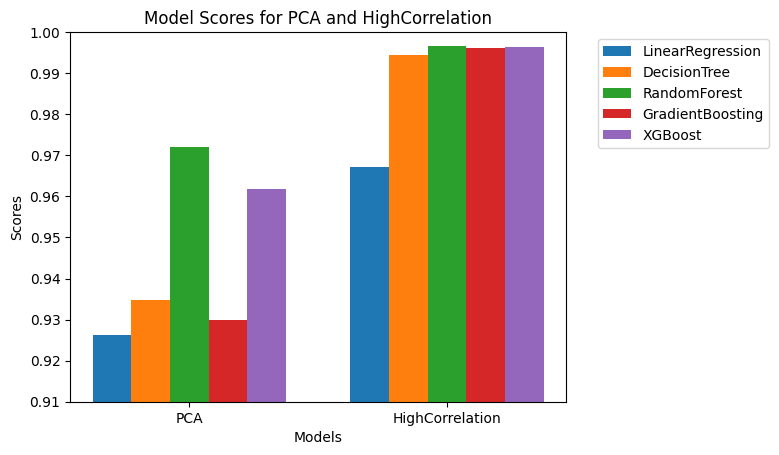

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Scores from my models
linear_regression_scores = [0.9263121943032401, 0.967245970872718]  # Scores for PCA and HighCorrelation
decision_tree_scores = [0.9348254569315383, 0.9943288970970062]
random_forest_scores = [0.971997019932781, 0.9966130468438323]
gradient_boosting_scores = [0.9299582831342067, 0.9961804363352589]
xgboost_scores = [0.9618367827842832, 0.9964525295316237]

# Bar positions
bar_width = 0.15
index = np.arange(len(linear_regression_scores))

# Creating the bar graph
fig, ax = plt.subplots()
bar1 = ax.bar(index, linear_regression_scores, bar_width, label='LinearRegression')
bar2 = ax.bar(index + bar_width, decision_tree_scores, bar_width, label='DecisionTree')
bar3 = ax.bar(index + 2 * bar_width, random_forest_scores, bar_width, label='RandomForest')
bar4 = ax.bar(index + 3 * bar_width, gradient_boosting_scores, bar_width, label='GradientBoosting')
bar5 = ax.bar(index + 4 * bar_width, xgboost_scores, bar_width, label='XGBoost')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Scores for PCA and HighCorrelation')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(['PCA', 'HighCorrelation'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylim(0.91, 1.0)

# Show the bar graph
plt.show()

## Generate Graph Showcasing Model's RMSE (PCA / High Correlation)

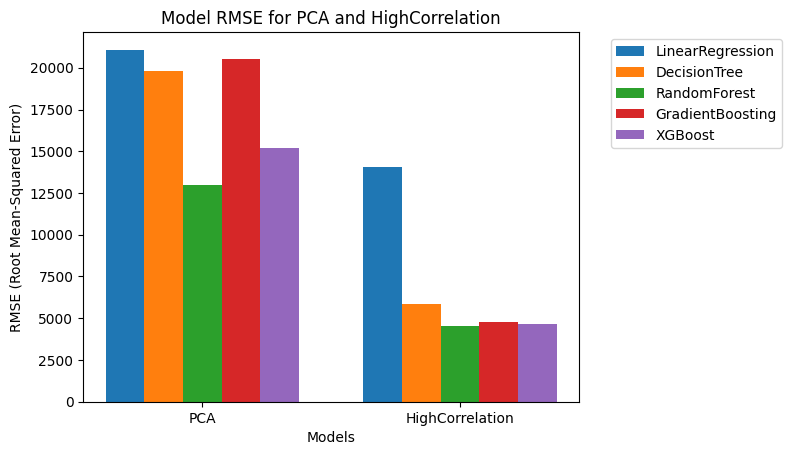

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# RMSEs of my models
linear_regression_scores = [21081.199029297244, 14054.968023121482]  # RMSE's for PCA and HighCorrelation
decision_tree_scores = [19826.063551293224, 5848.321785137958]
random_forest_scores = [12995.69834704965, 4519.6217658043915]
gradient_boosting_scores = [20553.031503122103, 4799.592577783003]
xgboost_scores = [15171.20183058689, 4625.48088768227]

# Bar positions
bar_width = 0.15
index = np.arange(len(linear_regression_scores))

# Creating the bar graph
fig, ax = plt.subplots()
bar1 = ax.bar(index, linear_regression_scores, bar_width, label='LinearRegression')
bar2 = ax.bar(index + bar_width, decision_tree_scores, bar_width, label='DecisionTree')
bar3 = ax.bar(index + 2 * bar_width, random_forest_scores, bar_width, label='RandomForest')
bar4 = ax.bar(index + 3 * bar_width, gradient_boosting_scores, bar_width, label='GradientBoosting')
bar5 = ax.bar(index + 4 * bar_width, xgboost_scores, bar_width, label='XGBoost')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('RMSE (Root Mean-Squared Error)')
ax.set_title('Model RMSE for PCA and HighCorrelation')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(['PCA', 'HighCorrelation'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the bar graph
plt.show()